# Problem Statement

The banking industries play a very important role in the modern economy. As an intermediary institution, banks act as intermediaries between parties with excess funds and parties in need of funds. Through credit distribution, banks can drive the economy, encourage investment, and boost economic growth of a country. Without the existence of efficient and healthy banks, economic activity can be hampered and growth can slow down.

However, the banking industry also faces significant risks, one of which is the risk of default or default on loans. This risk, if not managed properly, can have a negative impact on the stability of the economy as a whole. Massive defaults can lead to financial crises, such as the 2008 global financial crisis, which had a major negative impact on the world economy.

Therefore, the ability to predict the possibility of loan default is very important. With the development of technology and the increasing availability of data, machine learning offers a promising solution to overcome this challenge. Through historical data analysis and sophisticated algorithms, machine learning models can help banks identify loans that are at high risk of default. Thus, banks can take appropriate preventive measures to reduce risk and ensure financial stability.

# Data Wrangling

## Gathering Data

In [55]:
import pandas as pd
import os
import zipfile

#Load the dataset
nama_file_zip = 'C:/Users/Acer/Downloads/archive - 2024-08-04T113728.486.zip'
nama_file_csv = 'Loan_default.csv'
path_to_downloads = 'C:Users/Acer/Downloads'

with zipfile.ZipFile(nama_file_zip, 'r') as z:
    nama_file_csv = z.namelist()[0]
    z.extract(nama_file_csv, path='temp_folder')

file_path = os.path.join('temp_folder', nama_file_csv)
df = pd.read_csv(file_path)

#Display the dataset
df.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


# Assesing Data

In [7]:
#Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [8]:
#Check duplicated data
duplicates = df.duplicated().sum()
print("Num of duplicated rows =", duplicates)

Num of duplicated rows = 0


In [9]:
#Check null data
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
#Collect all of categorical columns
cat = df.select_dtypes(include='object').columns.tolist()

#Count the unique values for every column
for i in cat:
    print("Number of unique values for", i, 'column =', df[i].nunique())

Number of unique values for LoanID column = 255347
Number of unique values for Education column = 4
Number of unique values for EmploymentType column = 4
Number of unique values for MaritalStatus column = 3
Number of unique values for HasMortgage column = 2
Number of unique values for HasDependents column = 2
Number of unique values for LoanPurpose column = 5
Number of unique values for HasCoSigner column = 2


In [11]:
#Display the unique values for every column
for i in cat:
    print("Unique values in columns", i, "=", df[i].unique())

Unique values in columns LoanID = ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Unique values in columns Education = ["Bachelor's" "Master's" 'High School' 'PhD']
Unique values in columns EmploymentType = ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
Unique values in columns MaritalStatus = ['Divorced' 'Married' 'Single']
Unique values in columns HasMortgage = ['Yes' 'No']
Unique values in columns HasDependents = ['Yes' 'No']
Unique values in columns LoanPurpose = ['Other' 'Auto' 'Business' 'Home' 'Education']
Unique values in columns HasCoSigner = ['Yes' 'No']


## Cleaning Data

In [57]:
#Drop unused column
df.drop('LoanID', axis=1, inplace=True)

#Check if there are duplicated rows after dropping a column
df.duplicated().sum()

0

In [59]:
#Clean the content of eduaction column
df['Education'] = df['Education'].replace({"Bachelor's":"Bachelor", "Master's":"Master"})

In [61]:
#Convert the content of default column to yes and no
df['Default'] = df['Default'].apply(lambda x:'yes' if x == 1 else 'no')

In [63]:
#Check the dataset after cleaning
df.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor,Full-time,Divorced,Yes,Yes,Other,Yes,no
1,69,50432,124440,458,15,1,4.81,60,0.68,Master,Full-time,Married,No,No,Other,Yes,no


# Exploratory Data Analysis (EDA)

In [65]:
#Import libraries for exploratory data analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

### Analyzing Default by Categorical Variables

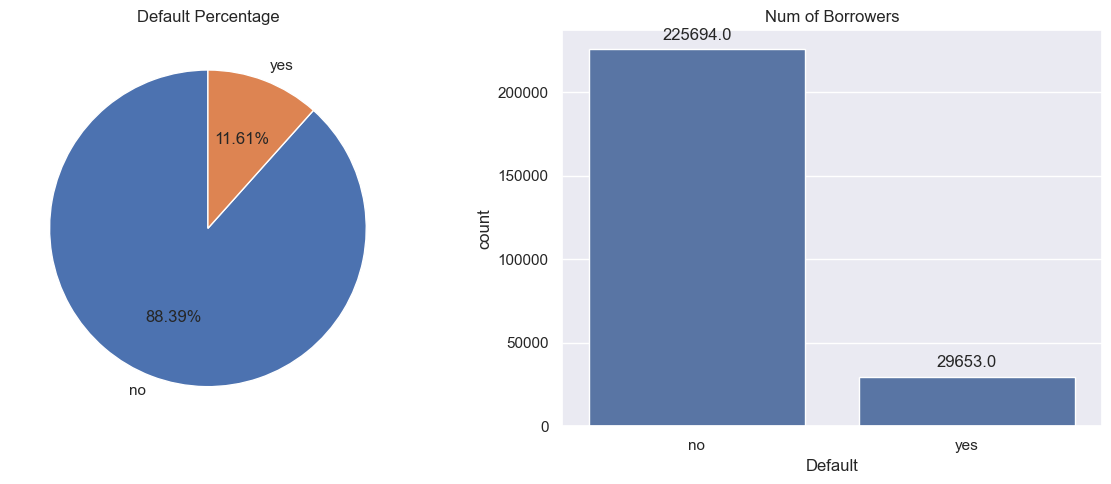

In [19]:
#Count the num of default borrowers and non default borrowers
data = df['Default'].value_counts()

#Create a subplots with one row and two columns to visualize the result
fig, axs = plt.subplots(1,2, figsize=(12,5))

#Visualize tje percentage of default borrowers using pie plot
axs[0].pie(data, labels=data.index, autopct="%1.2f%%", startangle=90)
axs[0].set_title("Default Percentage")

#Visualize the num of default customers and non default customers using countplot
sns.countplot(x=df['Default'], ax=axs[1])
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axs[1].set_title("Num of Borrowers")

#Show the visualization
plt.tight_layout()
plt.show()

**Analysis:**

The are 11.61% default borrowers and 88.39% non default borrowers in the dataset. Based on countplot visualization, the number of default borrowers is 29653 compared to non default borrowers (225694). From that result we can conclude that this dataset has imbalance problem because there's significant difference between both classes.

In [21]:
#Create a function which will allow us to visualize more efficient
def default_by(column):
    #Create a subplots which contains one row and two columns
    fig, axs = plt.subplots(1,2, figsize=(14,6))

    #Count the number of categorical values in a column
    data = df[column].value_counts()

    #Create a pie plot to visualize the percentage of categorical values in a column
    axs[0].pie(data.values, labels=data.index, startangle=90, autopct='%1.2f%%')
    axs[0].set_title(f"{column} percentage")

    #Create a countplot to visualize the number of categorical values in a column
    ax = sns.countplot(x=df[column], hue=df["Default"], ax=axs[1])
    axs[1].set_title(f"Default by {column}")
    total_counts = df['Default'].value_counts().sum()
    for p in axs[1].patches:
            percentage = f'{100 * p.get_height() / total_counts:.2f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axs[1].text(x, y, percentage, ha='center', va='bottom')

    #Show the visualization
    plt.tight_layout()
    plt.show()

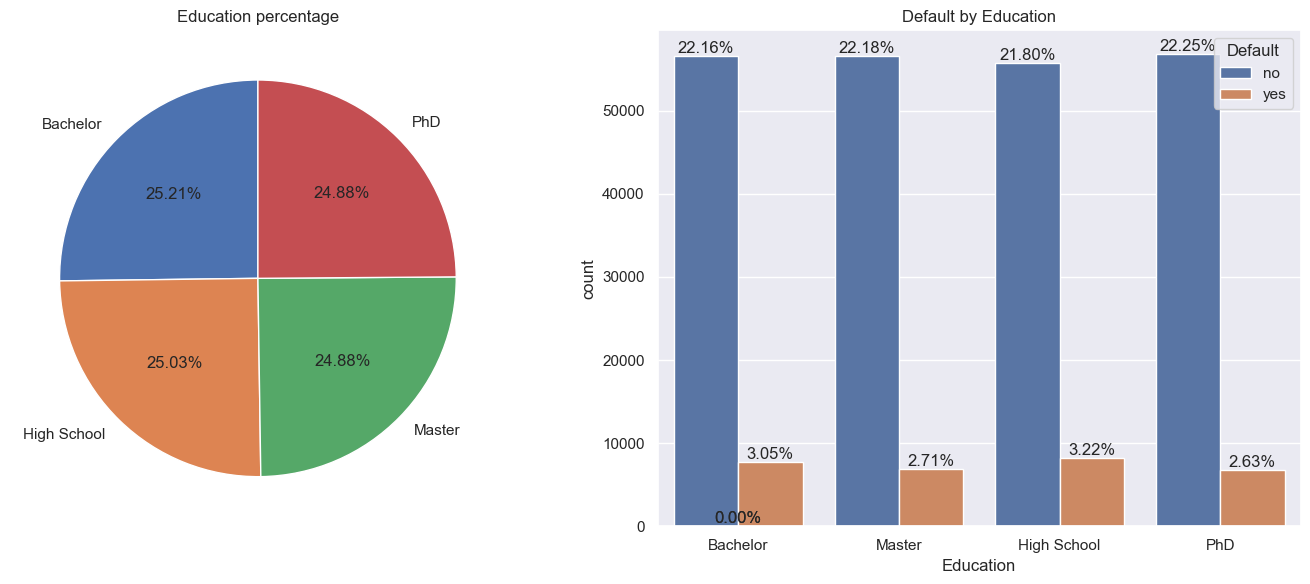

In [22]:
#Visualize default borrowers by their education background
default_by("Education")

**Analysis:**

Borrowers education background almost have balance distribution where most borrowers have bachelor education (25.21%). Borrowers with high school education background tend to be default borrowers because it's the largest default percentage (3.22%) and followed by borrowers with bachelor education background (3.05%).

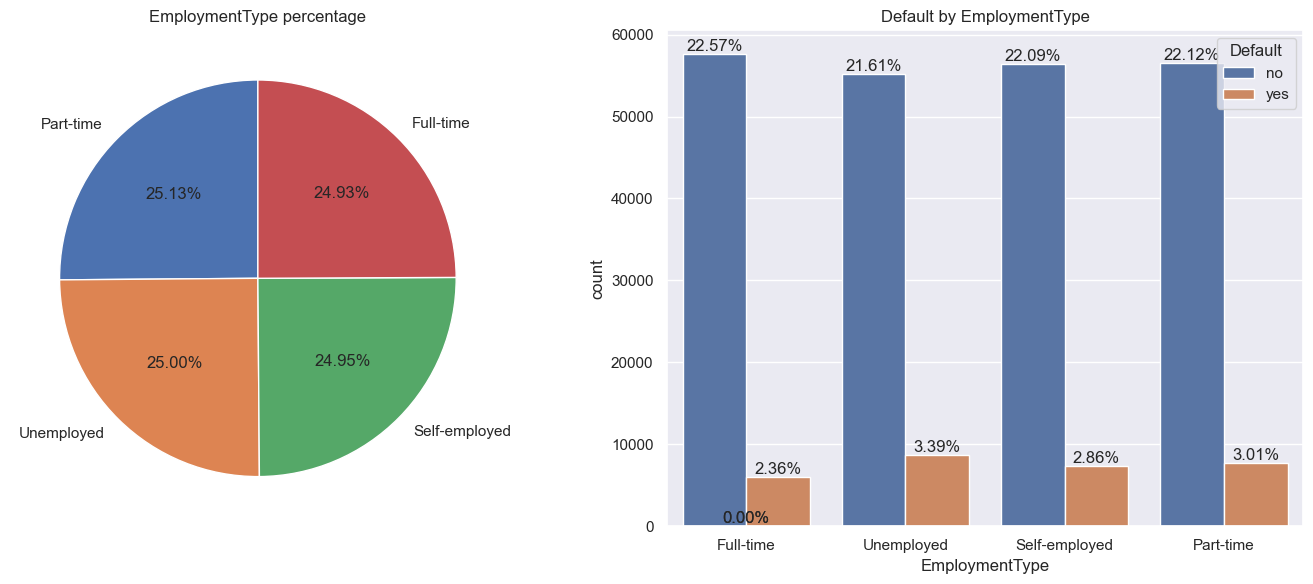

In [24]:
#Visualize default borrowers by their employment type
default_by("EmploymentType")

**Analysis:**

Most of borrowers are part-time employeers with the percentage 25.13%. And the second largest percentage is unemployed with the percentage 25%. Unemployed borrowers have the largest default percentage (3.39%) menawhile borrowers with full-time employment have the smallest default percentage (2.36%). Someone who doesn't have a job means they dont't have income, makes them to get into financial difficulties so they can't pay the loan and become default borrowers.

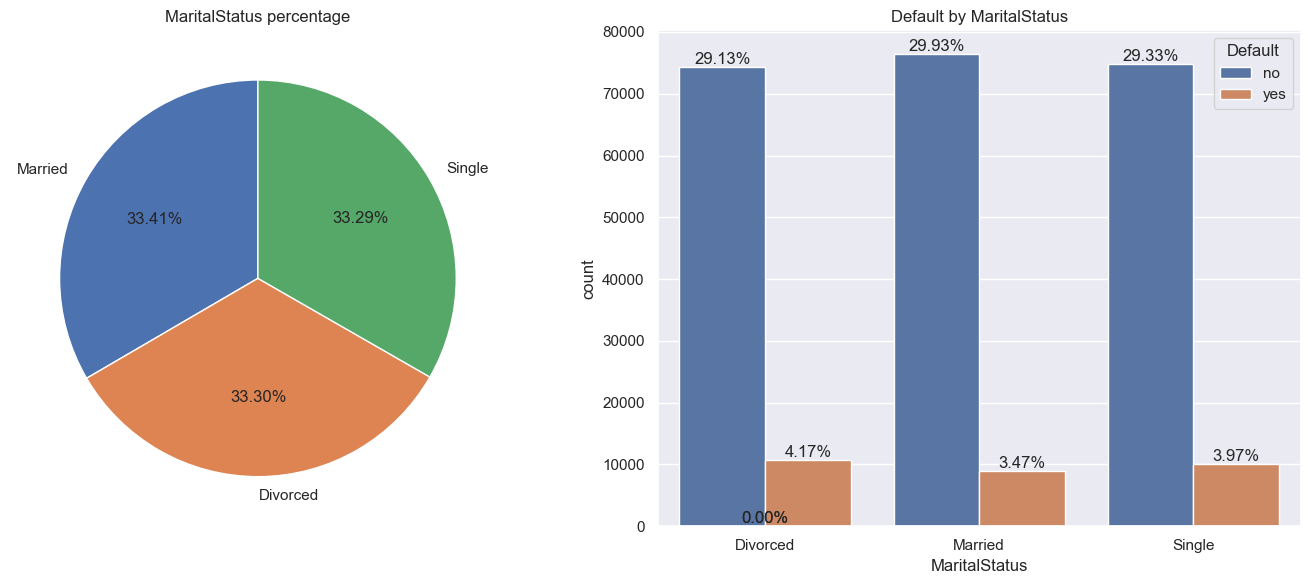

In [26]:
#Visualize default borrowers by their marital status
default_by("MaritalStatus")

**Analysis:**

Most of borrowers marital status is married with the percentage 33.41%, divorced (33.30%), and single (33.29%). The large amount default borrowers come from divorced borrowers with the percentage 4.17% and then followed by single (3.97%) and married (3.47%).

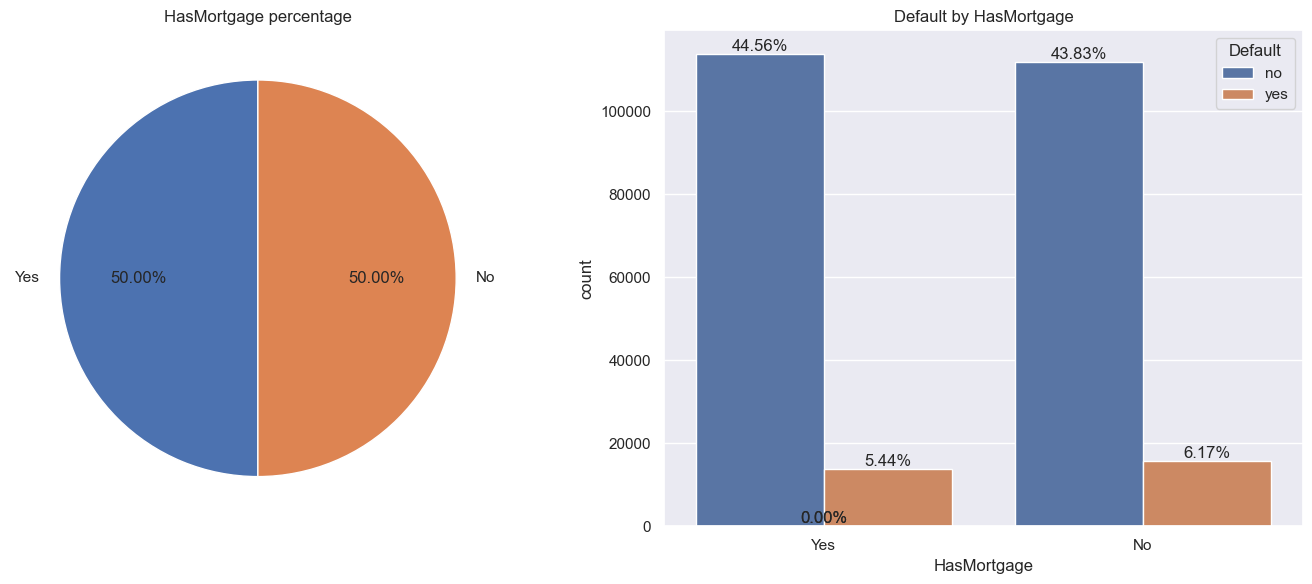

In [28]:
#Visualize default borrowers by their mortgage ownership
default_by("HasMortgage")

**Analysis:**

The percentage of mortgage ownership has the equal percentage (50%). Borrowers who don't have mortgage have a larger percentage of defaults (6.17%) compared to those who have a mortgage (5.44%).

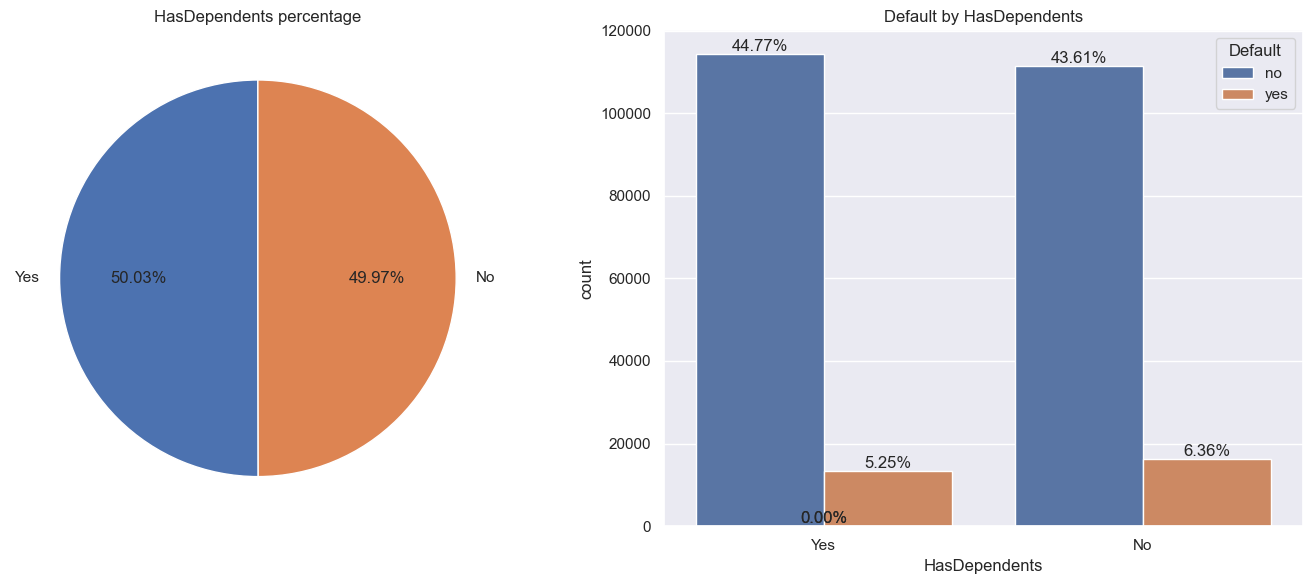

In [29]:
#Visualize default borrowers by their dependents owenrship
default_by("HasDependents")

**Analysis:**

The number of borrowers who have dependents compared to those who do not have dependents almost the same percentage. Both have a very small percentage difference. There are 50.03% of borrowers who have dependents while the rest do not (49.97%).Borrowers who have dependents tend to default with a greater percentage of 6.36% while borrowers who do not have dependents are only around 5.25% who default.

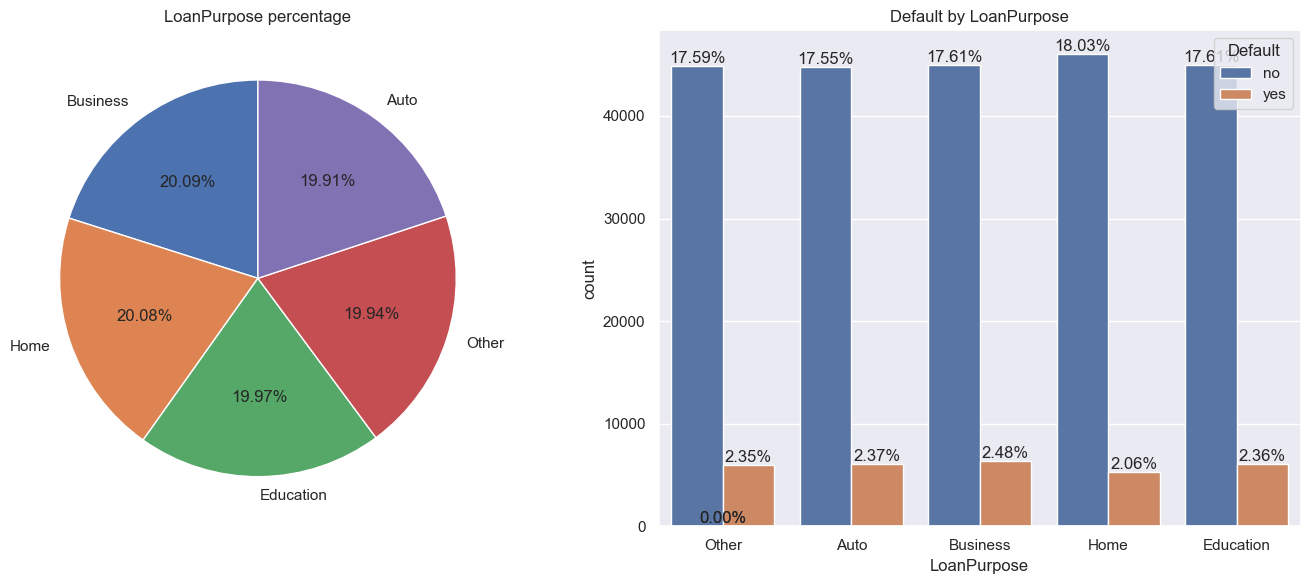

In [30]:
#Visualize default borrowers by their loan purpose
default_by("LoanPurpose")

**Analysis:**

There are five types of credit purposes: Education (19.97%), Home (20.08%), Business (20.09%), Auto (19.91%), and other (19.94%). There are two purposes of credit with the highest percentage of defaults: business and auto. Loans intended for business have a default percentage of 2.48%, while auto loans reach 2.37%.

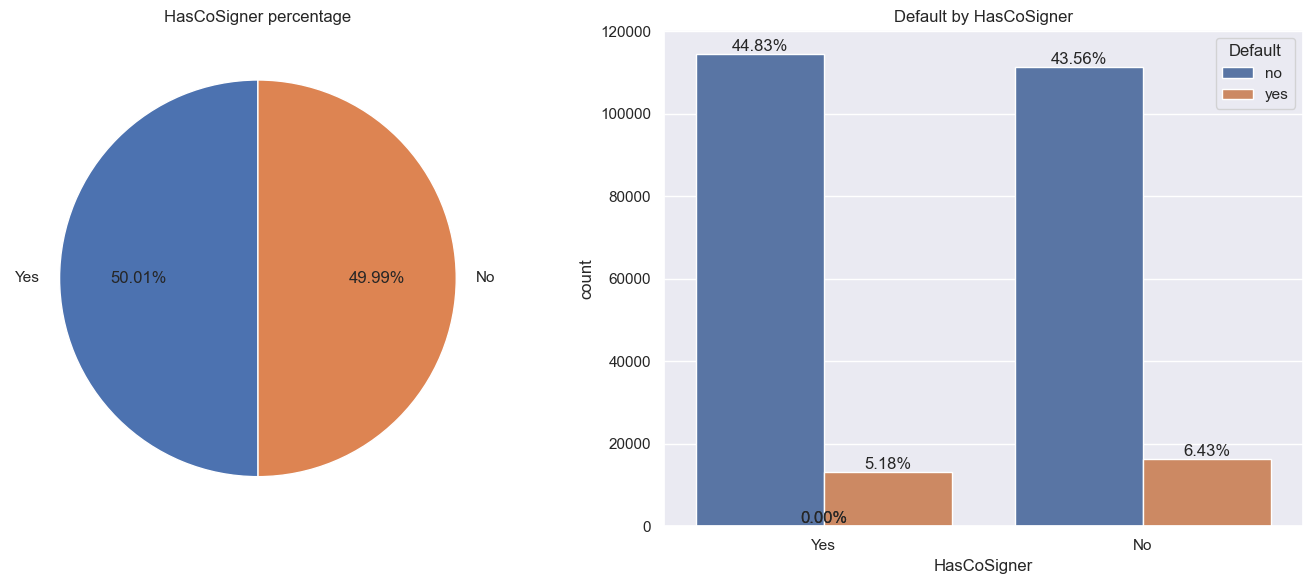

In [31]:
#Visualize default borrowers by their co signer ownership
default_by("HasCoSigner")

**Analysis:**

The percentage of borrowers who have a co-signer is almost the same percentage as borrowers who don't have a co-signer. Borrowers who have co-signers are 50.01% while borrowers who do not have co-signers are 49.99%. There are two purposes of credit with the highest percentage of defaults: business and auto. Loans intended for business have a default percentage of 2.48%, while auto loans reach 2.37%.

### Analyzing Default by Numerical Variables

In [163]:
#Create a function to visualize the numerical variables more efficient
def numplot(column):

    #Create a subplots with one row and two columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    #Count the percentage of 'Default' and 'No Default' for each unique value in the specified column
    data = df.groupby(column)['Default'].value_counts().unstack(fill_value=0)
    data['Default (%)'] = 100*data['yes']/data.sum(axis=1)
    data['No Default (%)'] = 100*data['no']/data.sum(axis=1)
    data = data.sort_values(by='Default (%)', ascending=False).reset_index()

    #Visualize the 'Default' percentage for the top 10 categories in the specified column using a barplot
    sns.barplot(data.head(10), y='Default (%)', x=column, ax=axs[0])
    for container in axs[0].containers:
        axs[0].bar_label(container, fmt='%.2f', label_type='edge')
        axs[0].set_title(f"Default percentage by {column}", fontsize=15)

    #Count the mean of the specified column for each 'Default' status
    mean_values = df.groupby('Default')[column].mean().reset_index()

    #Visualize the mean values of the specified column by 'Default' status using a barplot
    sns.barplot(x='Default', y=column, data=mean_values, ax=axs[1], palette="Set2")
    axs[1].set_title(f"Mean {column} by Default Status", fontsize=15)
    for p in axs[1].patches:
        height = p.get_height()
        axs[1].text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center', va='bottom',
        fontsize=12, color='black'
    )

    #Show the visualization
    plt.tight_layout()
    plt.show()

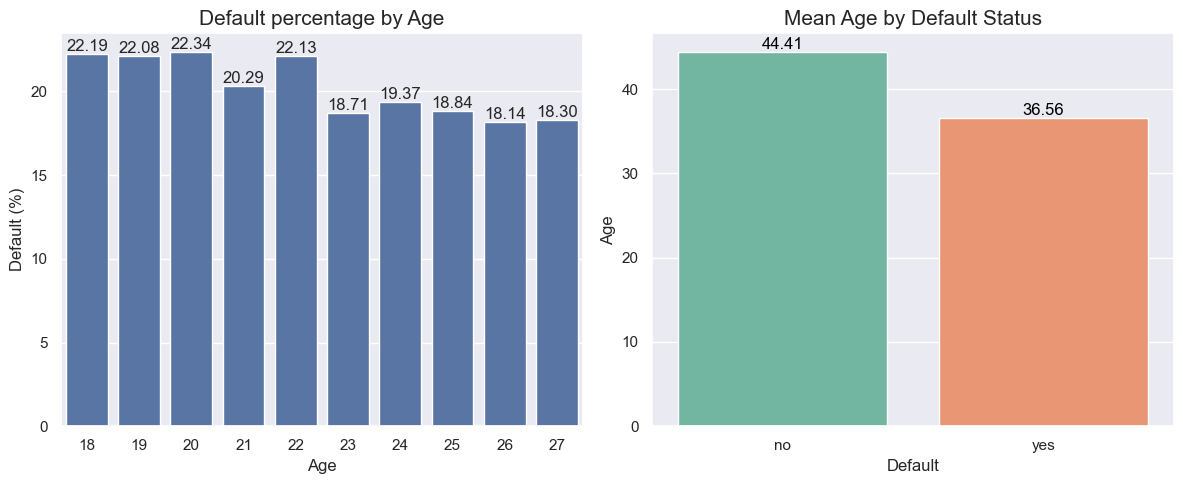

In [165]:
#Visualize default borrowers by their age
numplot("Age")

**Analysis:**

Younger borrowers tend to have higher percentage of default. The highest percentage of defaults are those borrowers with 20 years old (22.34%). Based on the mean of age, there's a significant difference. Borrowers who don't default have the older age (44.41) compared to default borrowers (36.56)

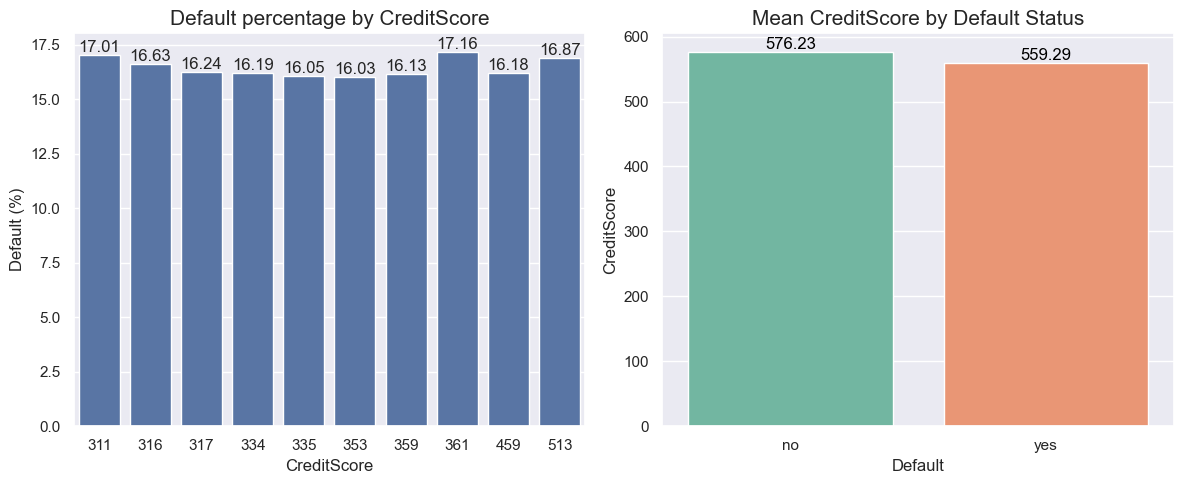

In [150]:
#Visualize default borrowers by their credit score
numplot("CreditScore")

**Analysis:**

The highest percentage of defaults are those with a credit score of 361 (17.16%) and followed by a credit score of 311 (17.01%). From the visualization in the right side, we can see that borrowers who don't default have the higher mean of credit score (576.23) compared to default borrowers (559.29).

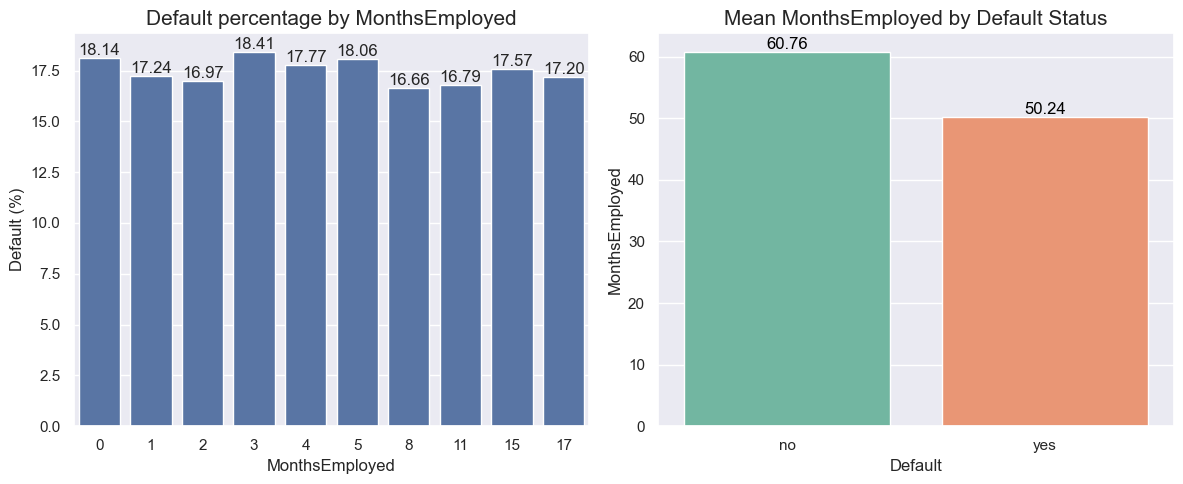

In [193]:
#Visualize default borrowers by their months employed
numplot("MonthsEmployed")

**Analysis:**

In the left bar chart visualization shows the default percentage for borrowers grouped by the number of months they have been employed. the highest percentage of defaulters were those who worked for three months (18.41%). Borrowers who did not default (No Default) have a higher mean employment duration (60.76 months) compared to those who defaulted (Default), who have an average of 50.24 months.

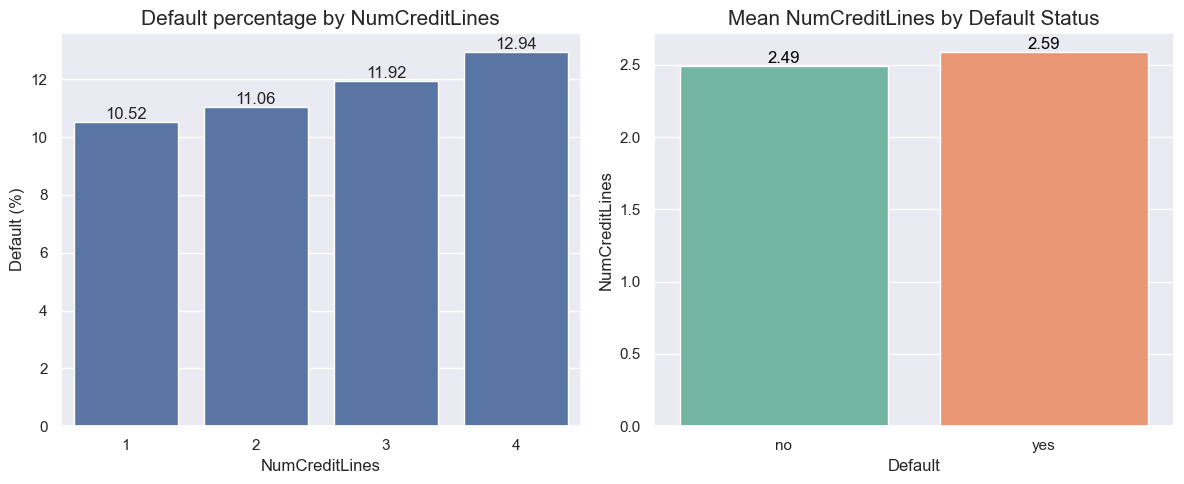

In [79]:
#Visualize default borrowers by their number credit lines
numplot("NumCreditLines")

**Analysis:**

From the left visualization shows that more credit lines tend to have higher percentage of default. There are 12.94% default borrowers with 4 credit lines. This is supported by the right visualization, default customers have higher mean of credit lines (2.59) compared to non default borrowers (2.49) although by a very small margin.

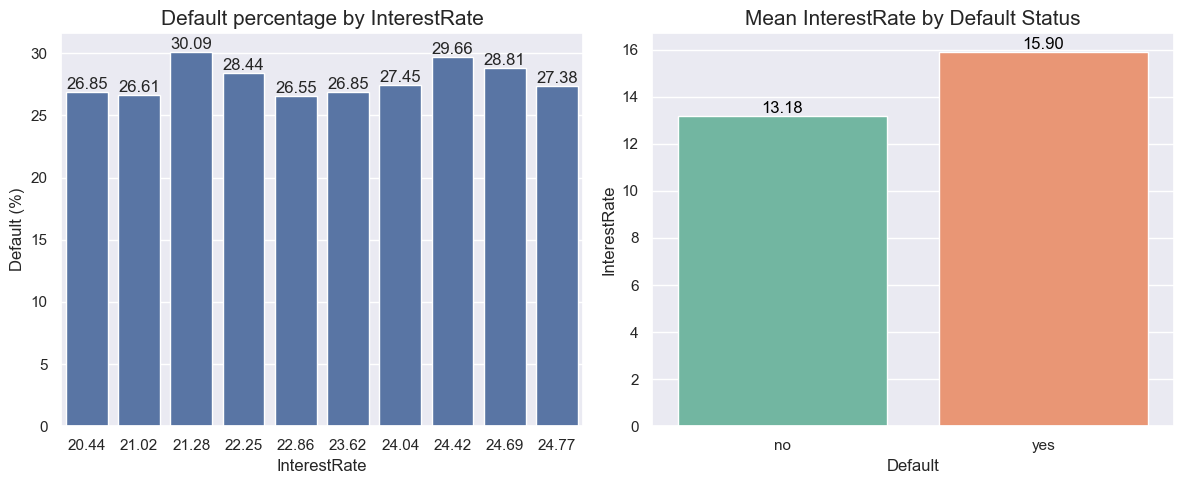

In [81]:
#Visualize default borrowers by their interest rate
numplot("InterestRate")

**Analysis:**

The highest percentage of defaulters are those with an interest rate  21.28% , there are 30.09% of borrowers who default. In addition, the visualization on the right also shows that borrowers who default face a higher average interest rate (15.90.%)

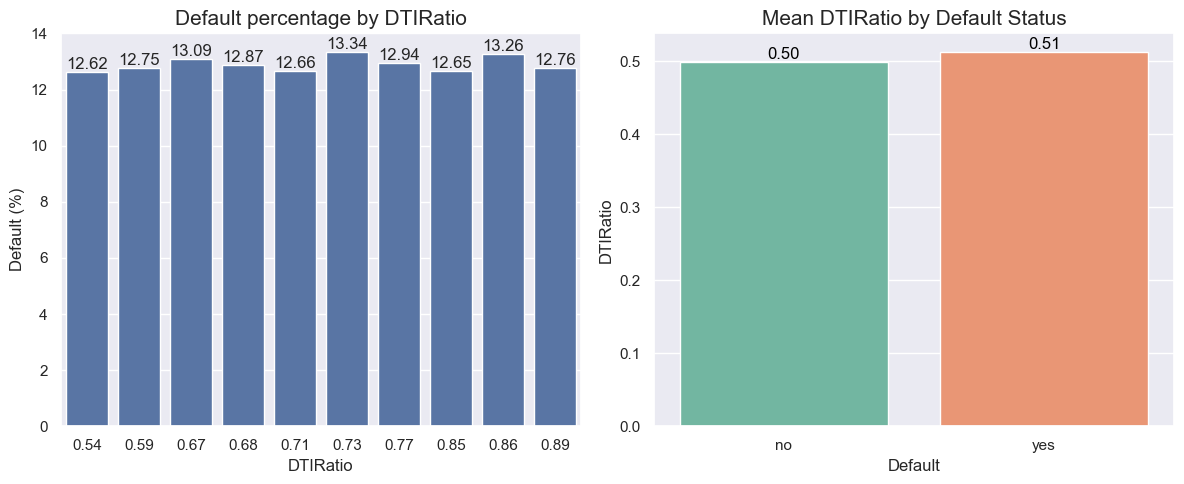

In [83]:
#Visualize default borrowers by their debt to income ratio
numplot("DTIRatio")

**Analysis:**

There is no significant difference when viewed from the DTIRatio. On the right side, it can be seen that the average borrower who defaults has a DTIRatio of 0.51 and there is a very small difference with borrowers who do not default (0.5.0)

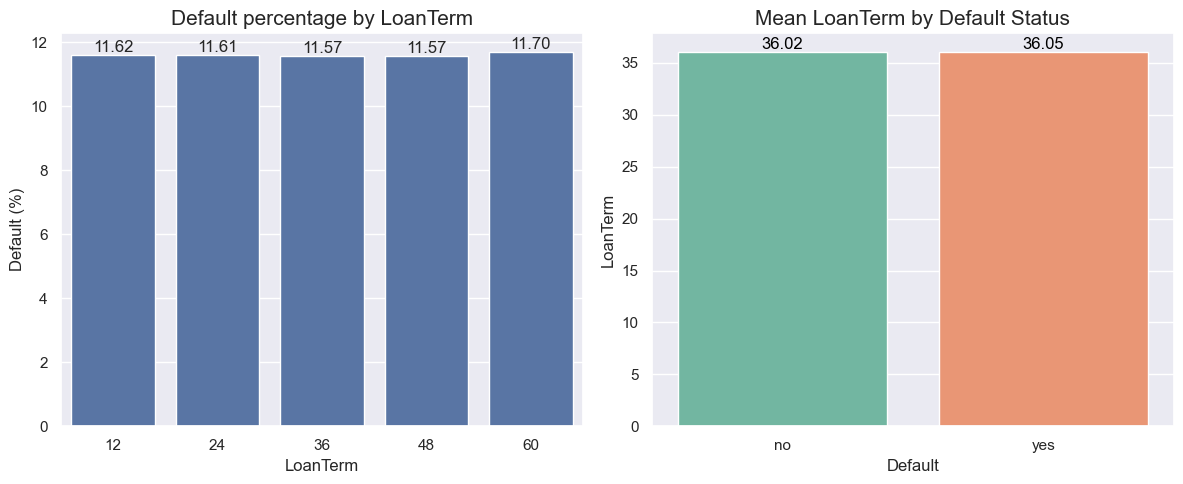

In [85]:
#Visualize default borrowers by their loan term
numplot("LoanTerm")

**Analysis:**

There is no significant difference when viewed from the LoanTerm. On the right side, it can be seen that the average borrower who defaults has a LoanTerm of 36.05 and there is a very small difference with borrowers who do not default (36.02).

### Analyzing Default by Continous Variables

In [127]:
#Create a function to visualize more efficient
def continous_plot(column):
    mean_values = df.groupby('Default')[column].mean().reset_index()
    ax = sns.barplot(x='Default', y=column, data=mean_values, palette="Set2")
    plt.title(f"Mean of {column} by Default Status", fontsize=15)
    total_counts = df['Default'].value_counts().sum()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

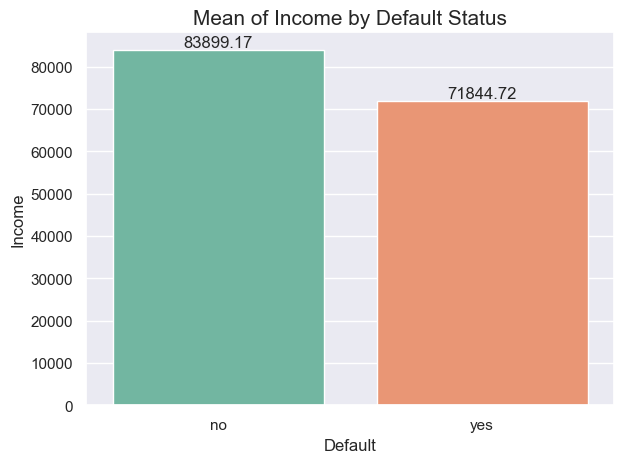

In [129]:
continous_plot("Income")

**Analysis:**

Borrowers who did not default had an average income of 83899.12. This amount is much greater than the average income of borrowers who default (71844.72).

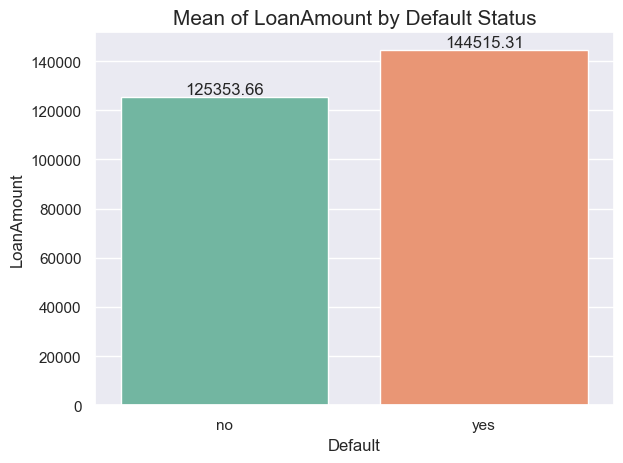

In [131]:
continous_plot("LoanAmount")

**Analysis:**

Default borrowers have higher loan amount with the mean of 144515.31 meanwhile borrowers who don't default have lower mean of loan amount (125353.66).

### Checking Distributions and Outliers

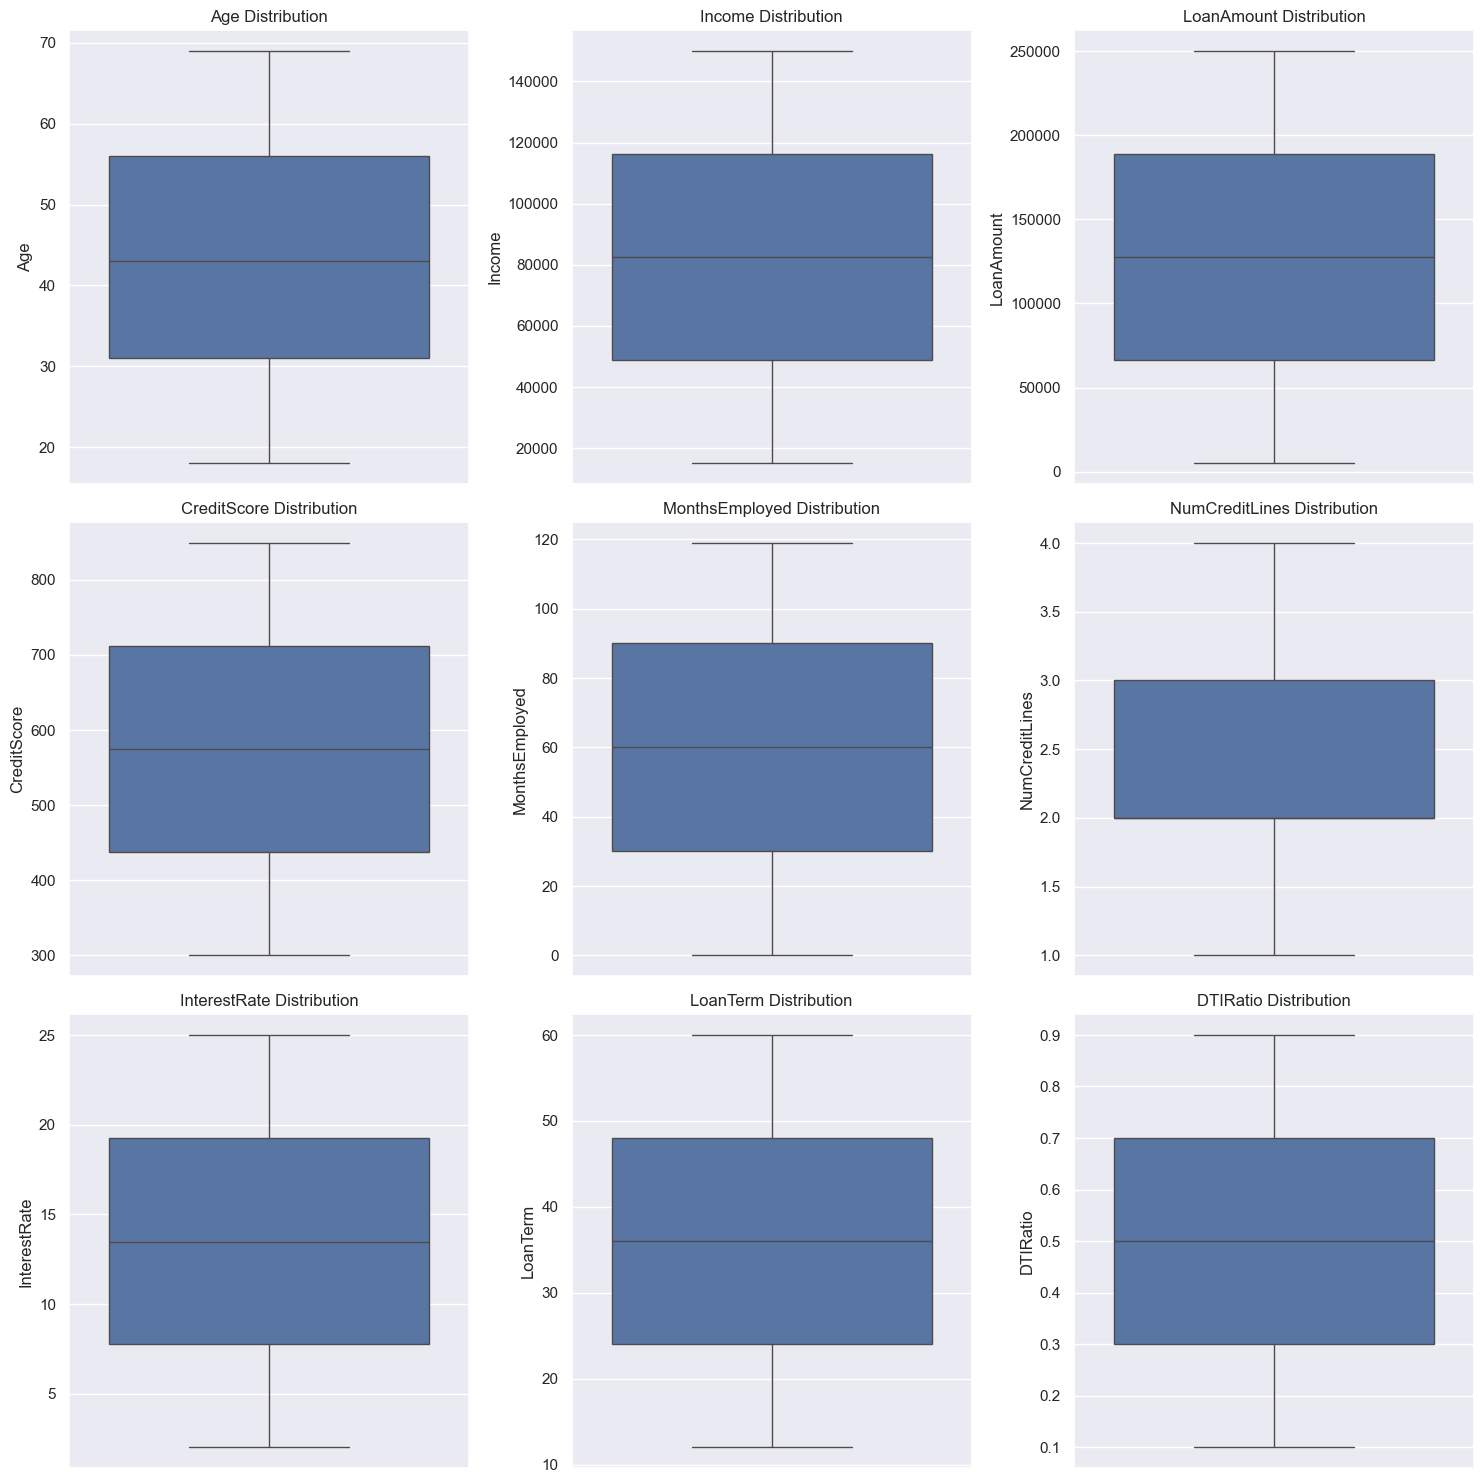

In [119]:
#Collect all the data with number to check wether there are outliers
col = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

num_cols = len(col)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,3*num_rows))
axs = axs.flatten()

for i,var in enumerate(col):
    sns.boxplot(data=df, y=var, ax=axs[i])
    axs[i].set_title(f'{var} Distribution')

plt.tight_layout()
plt.show()

**Analysis:**

Checking data distribution and outliers in this project uses a boxplot. After visualization, it can be seen that the data has a fairly good distribution and there are no outliers in the dataset used.

# Data Preprocessing

In [208]:
#Show the dataset before preprocessing
df[:1]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor,Full-time,Divorced,Yes,Yes,Other,Yes,no


In [11]:
#Collect all of the binary columns
col = ['HasMortgage', 'HasDependents', 'HasCoSigner']

#Create an iteration to apply labelling on these columns
for i in col:
    df[i] = df[i].map({'Yes':1, 'No':0})

#Create a manual labelling for default column. In this case we convert 'yes' to 1 and 'no' to 0
df['Default'] = df['Default'].map({'yes':1, 'no':0})

In [13]:
#Create a labelling for education column
edu = {"High School":0, "Bachelor":1, "Master":2, "PhD":3}
df["Education"] = df["Education"].map(edu)

In [15]:
#Collect all of the remain categorical columns
cat = df.select_dtypes(include='object').columns.tolist()

#Create an iteration to check the unique values for every remaining categorical column
for i in cat:
    print(df[i].unique())

['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
['Divorced' 'Married' 'Single']
['Other' 'Auto' 'Business' 'Home' 'Education']


In [17]:
#Import the library for encoding using Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Create an iteration to apply label encoding
for i in cat:
    df[i] = encoder.fit_transform(df[i])

In [19]:
#Show the dataset after labelling process
df.head(1)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,0,0,1,1,4,1,0


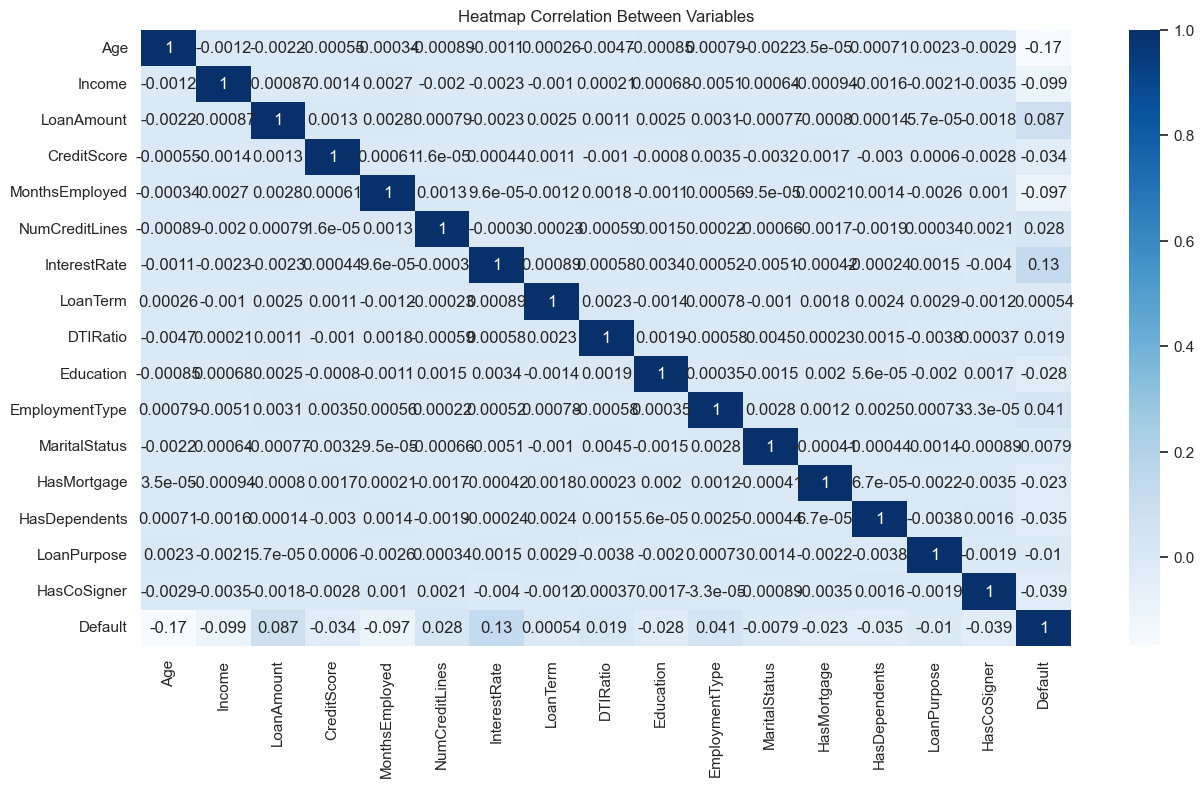

In [50]:
#Count the correlation between the columns
corr = df.corr()

#Visualize the correlation using heatmap in seaborn
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.title("Heatmap Correlation Between Variables")
plt.show()

In [51]:
#Split the dataset into features and target
X = df.drop("Default", axis=1)
y = df['Default']

# Machine Learning

In [31]:
#Import libraries for machine learning model
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

**NOTE:**

In this case, we will run five machine learning models for classification, there are Random Forest, Decision Tree, KNN, XGBoost, and Gradient Boosting. And then we will use the one that has the best performance esepecially based on their recall, accuracy on training & testing, precision, and AUC score.

In [64]:
#Initialize the machine learning models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# StratifiedKFold to ensure balanced target distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'AUC'])

for model_name, clf in models.items():
    # Initialize list to store metrics
    train_accuracies = []
    test_accuracies = []
    recalls = []
    precisions = []
    aucs = []

    # Cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        y_test_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else np.zeros_like(y_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        auc = roc_auc_score(y_test, y_test_proba) if len(np.unique(y_test)) > 1 else np.nan

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        recalls.append(recall)
        precisions.append(precision)
        aucs.append(auc)

    # Calculate the average of each metric
    model_results = {
        'Train Accuracy': np.mean(train_accuracies),
        'Test Accuracy': np.mean(test_accuracies),
        'Recall': np.mean(recalls),
        'Precision': np.mean(precisions),
        'AUC': np.mean(aucs)
    }

    # Add results to DataFrame
    results_df.loc[model_name] = model_results

# Count the difference between accuracy on the training and accuracy on the testing
results_df['Gap'] = np.abs(results_df['Train Accuracy'] - results_df['Test Accuracy'])
results_df

,Train Accuracy,Test Accuracy,Recall,Precision,AUC,Gap
Random Forest,0.999961,0.885752,0.047651,0.603038,0.731040,0.114209
Decision Tree,1.000000,0.802947,0.230297,0.198961,0.554241,0.197053
KNN,0.889713,0.873635,0.048359,0.261677,0.542451,0.016078
XGBoost,0.894292,0.885223,0.081982,0.538258,0.740956,0.009069
Gradient Boosting,0.886859,0.886347,0.051428,0.631029,0.752847,0.000512


Based on the results above, there are two best models: XGBoost and GradientBoosting. These model works well both on training and testing data with differences of 0.009069 and 0.000512 respectively. However, other metrics such as recall, precision, and AUC scores are still quite low. This happens because this dataset has an imbalance problem, namely that there is a very significant difference in the number of borrowers who fail to pay and those who do not. The next step is to apply SMOTE to overcome this imbalance problem and we hope that the other metrics will also be improved.

## Applying SMOTE

In [21]:
#Import SMOTE to overcame the imbalance problem
from imblearn.over_sampling import SMOTE

#Split the dataset into target and features
X = df.drop("Default", axis=1)
y = df['Default']

#Initializing the SMOTE
smt = SMOTE(random_state=42)

#Applying SMOTE on the target and features
X_resampled, y_resampled = smt.fit_resample(X,y)

In [22]:
#Create a dataframe (df2) after the resampling
df2 = pd.DataFrame(X_resampled, columns=X.columns)
df2['Default'] = y_resampled

#Check the dataframe after resampling
df2.head(1)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,0,0,1,1,4,1,0


In [77]:
#Check whether the class in the target column is balanced
df2['Default'].value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

After resampling using SMOTE both classes in the target column has been balanced. Default borrowers and non default borrowers have the same number.

In [25]:
#Split the dataset after resampling into features and target
X = df2.drop("Default", axis=1)
y = df2['Default']

In [87]:
#Initialize the machine learning models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# StratifiedKFold untuk memastikan distribusi target yang seimbang
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi DataFrame untuk menyimpan hasil
results_df = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'AUC'])

for model_name, clf in models.items():
    # Inisialisasi list untuk menyimpan metrik
    train_accuracies = []
    test_accuracies = []
    recalls = []
    precisions = []
    aucs = []

    # Cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        y_test_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else np.zeros_like(y_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        auc = roc_auc_score(y_test, y_test_proba) if len(np.unique(y_test)) > 1 else np.nan

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        recalls.append(recall)
        precisions.append(precision)
        aucs.append(auc)

    # Hitung rata-rata dari setiap metrik
    model_results = {
        'Train Accuracy': np.mean(train_accuracies),
        'Test Accuracy': np.mean(test_accuracies),
        'Recall': np.mean(recalls),
        'Precision': np.mean(precisions),
        'AUC': np.mean(aucs)
    }

    # Tambahkan hasil ke DataFrame
    results_df.loc[model_name] = model_results

## Select the best model

In [89]:
#Count the difference between training accuracy and testing accuracy
results_df['Gap'] = abs(results_df['Train Accuracy'] - results_df['Test Accuracy'])

#Categorize the model based on their performance
results_df['Status'] = np.where(results_df['Gap'] > 0.05, 'Overfitting', 'Best')

#Show the result
results_df

,Train Accuracy,Test Accuracy,Recall,Precision,AUC,Gap,Status
Random Forest,0.999997,0.881381,0.856478,0.901377,0.946985,0.118615,Overfitting
Decision Tree,1.000000,0.818814,0.836110,0.808158,0.818814,0.181186,Overfitting
KNN,0.836829,0.760313,0.875070,0.711724,0.836817,0.076516,Overfitting
XGBoost,0.907838,0.900270,0.854675,0.940434,0.954915,0.007568,Best
Gradient Boosting,0.877219,0.876563,0.831666,0.913714,0.942089,0.000656,Best


**Analysis:**

After applying SMOTE to overcome the imbalance, it can be seen that there are improvements in several models. The two best models: XGBoost and Gradient Boosting have significant improvements in recall, precision and AUC. Apart from that, the two models also have a very small gap, which indicates that they work well both on training and testing and they don't have overfitting problem. Therefore, these two models can be used than the other three models.

Furthermore, in choosing which model is appropriate for predicting borrowers who will default, choosing a model that has a high recall is a mus High recall indicates that the model is very effective in detecting **all positive cases** in the dataset. In the context of predicting borrowers who will default, this means the model is able to **identify almost all borrowers** who are truly at risk of default.

If Recall is High, This Means:

**Few Cases are Missed:**
A model with high recall successfully identifies the majority of borrowers who are at risk of defaulting. There are only a few cases that are missed (false negatives), meaning that nearly all at-risk borrowers are detected.

**Effectiveness in Risk Detection:**
High recall indicates that the model is very effective at capturing and detecting the existing risks. In the lending world, this is crucial because identifying high-risk borrowers early allows the bank to take necessary preventive actions.

**Focus on Sensitivity:**
A model with high recall prioritizes **sensitivity**—the ability to capture all high-risk borrowers—even if it means sacrificing a bit of accuracy in terms of correct predictions (precision). This means the model is designed to ensure that very few high-risk borrowers slip through the cracks.t.

## XGBoost Model

In [27]:
#Import the libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [33]:
#Split the features and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Set the parameter for the selected machine learning model (XGBClassifier)
parameter = {'n_estimators':[100,150], 'max_depth':[3,5,7]}

#Initialize the XGBClassifier model
model = XGBClassifier()

#Perform a grid search to find the best combination of parameters using cross-validation
grid_search = GridSearchCV(model, parameter, cv=5).fit(X_train, y_train)

#Print the best parameter for the model
print(grid_search.best_params_)

{'max_depth': 7, 'n_estimators': 150}


In [226]:
# Train the selected model with the best barameter based on grid search result
model = XGBClassifier(max_depth=7, n_estimators=150).fit(X_train, y_train)

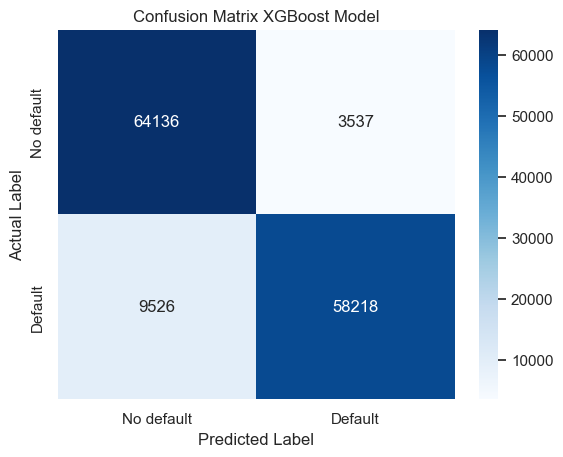

In [249]:
#Make the predictions
y_pred = model.predict(X_test)

#Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix XGBoost Model")
plt.show()



**From the confusion matrix above, here are the insights:**

1. **True Positive (TP): 58218**
   - **Definition:** The model correctly predicts that a borrower will default.
   - **Interpretation:** This shows the number of cases where the model accurately identified borrowers who will indeed default. This is important because it helps us capture high-risk cases that may require preventive action.

2. **False Positive (FP): 3537**
   - **Definition:** The model incorrectly predicts that a borrower will default when they actually will not.
   - **Interpretation:** This indicates the number of cases where the model provided a false default prediction. This could lead to additional costs if the financial institution takes preventive measures against borrowers who are not actually at risk of default.

3. **True Negative (TN): 64136**
   - **Definition:** The model correctly predicts that a borrower will not default.
   - **Interpretation:** This shows the number of cases where the model accurately identified borrowers who will not default. This helps ensure that safe borrowers are not mistakenly considered as risks.

4. **False Negative (FN): 9526**
   - **Definition:** The model incorrectly predicts that a borrower will not default when they actually will.
   - **Interpretation:** This shows the number of cases where the model failed to identify borrowers who are actually at risk of default. This could lead to significant losses because the financial institution might not take the necessary actions against high-risk borrowers.high-risk borrowers.high-risk borrowers.

In [251]:
#Count the accuracy score of the model
model_accuracy = accuracy_score(y_test, y_pred)

#Count the precison score of the model
model_precision = precision_score(y_test, y_pred)

#Count the recall score of the model
model_recall = recall_score(y_test, y_pred)

#Print the accuracy, precision, and recall score
print("Accuracy score of the XGBoost model =", round(model_accuracy*100,4), '%')
print("Precision score of the XGBoost model =", round(model_precision*100,4), '%')
print("Recall score of the XGBoost model =", round(model_recall*100, 4), '%')

Accuracy score of the XGBoost model = 90.3535 %
Precision score of the XGBoost model = 94.2725 %
Recall score of the XGBoost model = 85.9382 %


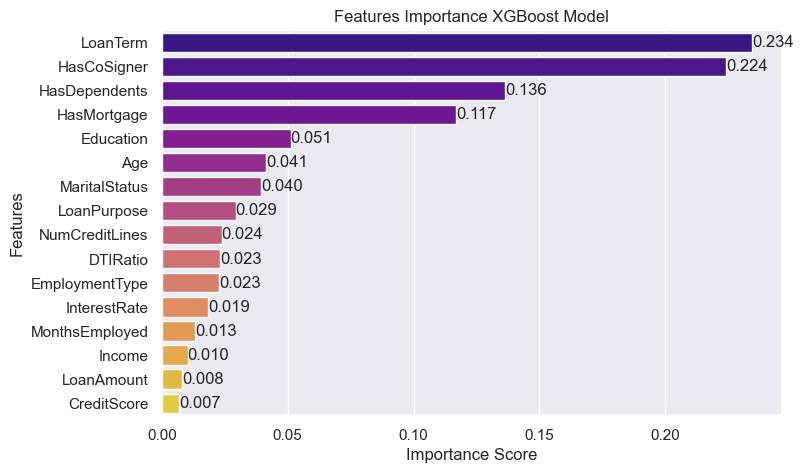

In [234]:
#Create a dataframe that performs features importance
fi = pd.DataFrame({'Features': X.columns, 'Importance Score': model.feature_importances_}).sort_values(by='Importance Score', ascending=False)

#Visualize the feature importance using barplot
plt.figure(figsize=(8,5))
sns.barplot(fi, x='Importance Score', y='Features', palette='plasma')
for index, value in enumerate(fi['Importance Score']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.title("Features Importance XGBoost Model")
plt.show()

There are four key features that play a significant role in predicting whether someone might default on a loan:

1. **Loan Term (0.234)**: The length of time given to repay the loan is the most critical factor, with a score of 0.234. Longer loan terms are more likely to be associated with a higher risk of default due to the increased uncertainty over time.

2. **Presence of a Co-Signer (0.224)**: Having a co-signer, who is responsible for the loan if the borrower cannot pay, greatly reduces the risk of default. This feature has a score of 0.224, highlighting its importance as an additional layer of security for lenders.

3. **Dependents (0.136)**: Borrowers with dependents, such as children or elderly family members, are more likely to default, as indicated by a score of 0.136. This is because they typically have more financial obligations, which could strain their ability to repay the loan.

4. **Existing Mortgage (0.117)**: If the borrower already has a mortgage, this increases the risk of defaulting on a new loan. With a score of 0.117, this feature shows that managing multiple financial commitments can be challenging, making it more difficult to meet all payment obligations.

These features and their respective scores help build a comprehensive picture of the borrower's financial situation and potential risk, aiding in more accurate predictions of loan default. default."